# Laboratorio 04: Interpolación.

---
### Profesor: Daniel Ruiz Mejía
### Nombre: Martín Calvo
*Métodos computacionales 2025-I*

---

In [1]:
#@title Funciones e imports

import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange
from scipy.interpolate import CubicSpline, CubicHermiteSpline
from scipy.interpolate import interp1d
from math import factorial
import sympy as sp
sp.init_printing()
import pandas as pd
import urllib.request
def interplineal(x,y):
  """
  x:tupla, valores de x inicial y final
  y:tupla, valores de y inicial y final
  x, y deben tener el mismo tamaño
  devuelve la función de la recta entre los dos puntos
  """
  if len(x)!= len(y):
    raise ValueError("los arrays deben tener el mimso tamaño")
  def funcion(xinterp):
    """
    recibe un valor x deseado y lo evalúa en la recta interpolada
    DEBE ESTAR DENTRO DEL INTERVALO
    """

    return (xinterp-x[0])*((y[0]-y[-1])/(x[0]-x[-1])) + y[0] #y=mx+b
  return funcion
#-------------------------------------------------------------------------------------------
def interplagrange(x,y):
  """
  x:array de coordenadas x de los puntos
  y: array de coordenadas y de los puntos
  Devuelve una función de un polinomio de un grado menor a la cantidad de puntos
  """
  def sumatoria(xinterp):

    L=np.zeros_like(x)
    suma=0

    for i in range(0,len(x)):
      producto=1
      for j in range(0, len(x)):
        if i!=j:
          producto*=(xinterp-x[j])/(x[i]-x[j])
      suma+= y[i]*producto
    return suma
  return sumatoria

#-------------------------------------------------------------------------------------------

def diferencias_divididas(x,y,i,j):
  if i==j:
    return y[i]
  else:
    num=diferencias_divididas(x,y,i+1,j)-diferencias_divididas(x,y,i,j-1)  #La función va cogiendo de a pares entonces se construye reiterando los pares hasta que se cumpla la primera condición
    den= x[j]-x[i]
    return num/den
def interpnewton(x,y):
  """
  x:array de coordenadas x de los puntos
  y:array de coordenadas y de los puntos
  Devuelve una función, polinomio de Newton
  """

  def funcion(xinterp):
    producto=1
    suma=y[0]
    for i in range(1,len(x)):

      a=diferencias_divididas(x,y,0,i)
      producto*=(xinterp-x[i-1])
      suma+=a*producto
    return suma
  return funcion
#-------------------------------------------------------------------------------------------------

def baseslagrange(x,i):
  """
  x:array de las coordenadas x de los puntos
  i: es la iteración en la que está
  Devuelve la función h(x), base de lagrange
  """
  def funcion(xinterp):


    for j in range(len(x)):
      producto=1
      if i!=j:
        producto*=(xinterp-x[j])/(x[i]-x[j])
    return producto
  return funcion

def interphermite(x,y,dy):
  """
  x: array con las coordenadas x de los puntos
  y: array con las coordenadas y de los puntos
  dy: array con el valor de la derivada en cada punto
  Devuelve un polinomio de grado 2n+1, siendo n+1 el número de puntos
  """

  def funcion(equis):
    suma=0
    z=sp.symbols("z")
    for i in range(len(x)):
      h=baseslagrange(x,i)
      hprima=sp.lambdify(z,sp.diff(h(z),z))
      A=(h(equis)**2)*((1-2*(equis-x[i])*hprima(x[i])))
      B=(h(equis)**2)*(equis-x[i])
      suma+=A*y[i]+B*dy[i]
    return suma
  return funcion
#-------------------------------------------------------------------------------------------


# 1.

Un automóvil que viaja a lo largo de una carretera recta es cronometrado en varios puntos. Los datos de las observaciones se dan en la siguiente tabla, donde el tiempo está en segundos, la distancia en metros y la velocidad en metros por segundo.

```
tiempos = np.array([0, 3, 5, 8, 13]) # segundos
distancias = np.array([0, 225, 383, 623, 993]) # metros
velocidades = np.array([75, 77, 80, 74, 72]) # metros/segundo
```

- Usar un polinomio de Hermite y de Splines Cúbicos para predecir la posición del automóvil y su velocidad cuando $t=10$ s.
- ¿Cuál es la velocidad máxima predicha para el automóvil en cada caso?

In [27]:
tiempos = np.array([0, 3, 5, 8, 13]) # segundos
distancias = np.array([0, 225, 383, 623, 993]) # metros
velocidades = np.array([75, 77, 80, 74, 72]) # metros/segundo

Phermited=CubicHermiteSpline(tiempos,distancias,velocidades)
Psplinesd=CubicSpline(tiempos,distancias)

a=Phermited.derivative(2) #La aceleración para tener el hermite de las velocidades en el tiempo
aceleraciones=a(tiempos)

print(f"La distancia recorrida a los 10 segundos dada por el polinomio de Hermite es {Phermited(10):.4f}m")
print(f"La distancia recorrida a los 10 segundos dada por la función CubicSpline es {Psplinesd(10):.4f}m")

Phermitev=CubicHermiteSpline(tiempos,velocidades,aceleraciones)
Psplinesv=CubicSpline(tiempos,velocidades)

print(f"La velocidad a los 10 segundos dada por el polinomio de Hermite es {Phermitev(10):.4f}m/s")
print(f"La velocidad a los 10 segundos dada por la función CubicSpline es {Psplinesv(10):.4f}m/s")

tspace=np.linspace(min(tiempos),max(tiempos),1000)  #en este ciclo se hacen listan con las funciones de velociad en el tiempo evaluadas en muchos tiempos
listavh=[]
listavs=[]
for i in tspace:
    listavh.append(Phermitev(i))
    listavs.append(Psplinesv(i))

vmaxh=max(listavh) #Acá se encuentra la mayor de esas velocidades
vmaxs=max(listavs)
print(f"Las velocidades máximas dadas por Hermite y CubicSpline respectivamente son {vmaxs:.4f}m/s y {vmaxh:.4f}m/s")


La distancia recorrida a los 10 segundos dada por el polinomio de Hermite es 771.9600m
La distancia recorrida a los 10 segundos dada por la función CubicSpline es 778.4191m
La velocidad a los 10 segundos dada por el polinomio de Hermite es 74.6400m/s
La velocidad a los 10 segundos dada por la función CubicSpline es 68.6151m/s
Las velocidades máximas dadas por Hermite y CubicSpline respectivamente son 80.0028m/s y 80.8916m/s


# 2.
Los valores de la aceleración gravitacional $g$ dependen de la altitud $y$ según se muestra en la tabla. Utilice el método de diferencias divididas de Newton para estimar el valor de la aceleración gravitacional a las altitudes de 5,000 m, 42,000 m y 90,000 m. Grafique la distribución de la función de interpolación obtenida junto con los datos dados.

```
y = [0, 20000, 40000, 60000, 80000]  # en metros
g = [9.8100, 9.7487, 9.6879, 9.6278, 9.5682]  # en m/s²
```

-9.794654101562498
-9.681858665
-9.538415625


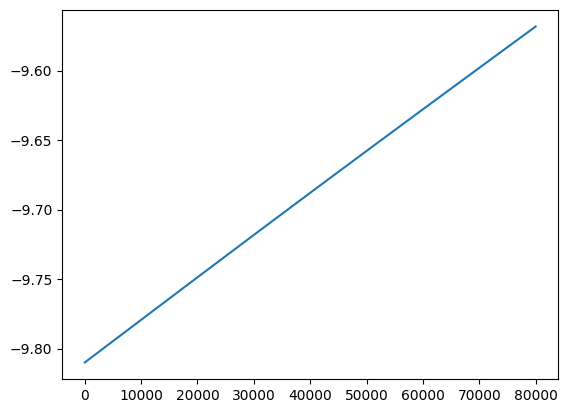

In [28]:
y = [0, 20000, 40000, 60000, 80000]  # en metros
g = [-9.8100, -9.7487, -9.6879, -9.6278, -9.5682]  # en m/s²
Pnewton=interpnewton(y,g)
yspace=np.linspace(min(y),max(y))
plt.plot(yspace,Pnewton(yspace))
a=[5000,42000,90000]
for i in a :
    print(Pnewton(i))

#no hay mucho que comentar, se encuentran las aceleraciones pedidas con el método pedido. Les cambié el signo porque me pareció más apropiado para la gravedad

# 3.
La densidad del aire $\rho$ depende de la temperatura $T$ como se muestra en la tabla. Utilice el método de diferencias divididas de Newton para estimar los valores de la densidad del aire a 250 K, 800 K y 3,000 K. Luego, determine la densidad del aire a temperaturas desde 100 K hasta 2,500 K en intervalos de 10 K. Grafique la distribución de la densidad del aire calculada en función de la temperatura.

```
T = np.array([100, 200, 300, 500, 700, 1000, 1500, 2000, 2500]) # en K
rho = np.array([3.6010, 1.7684, 1.1774, 0.7048, 0.5030, 0.3524, 0.2355, 0.1762, 0.1394]) # en kg/m^3
```



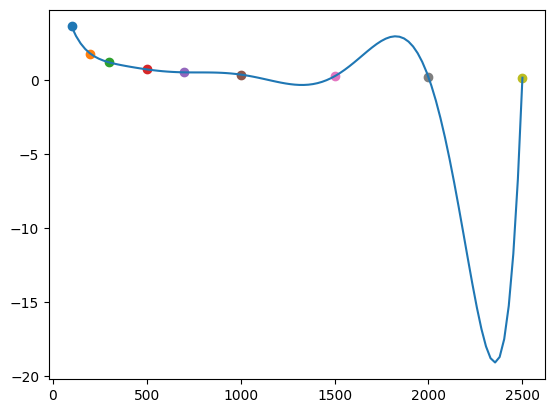

1.3975329155606775
0.4964089902361964
1561.165866794854
Con Newton el polinomio fluctúa cerca de estos valores


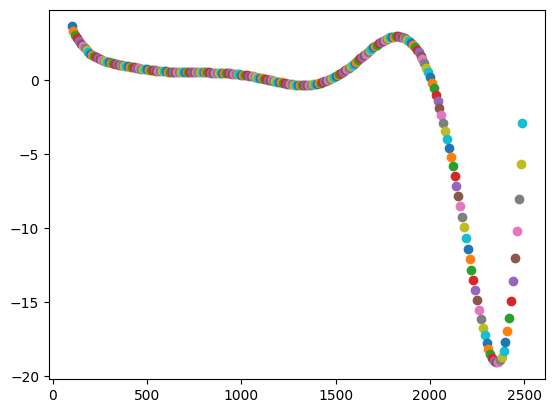

In [29]:
T = np.array([100.0, 200.0, 300.0, 500.0, 700.0, 1000.0, 1500.0, 2000.0, 2500.0]) # en K
rho = np.array([3.6010, 1.7684, 1.1774, 0.7048, 0.5030, 0.3524, 0.2355, 0.1762, 0.1394]) # en kg/m^3

Pnewton=interpnewton(T,rho)
Tarange=np.arange(100,2500,10)
Tspace=np.linspace(100,2500,100)
plt.plot(Tspace,Pnewton(Tspace))
a=[250,800,3000]
for i in range(len(T)):
    plt.scatter(T[i],rho[i])
plt.show()
for i in a:
    print(Pnewton(i))
print("Con Newton el polinomio fluctúa cerca de estos valores")
for i in Tarange:
    plt.scatter(i,Pnewton(i))

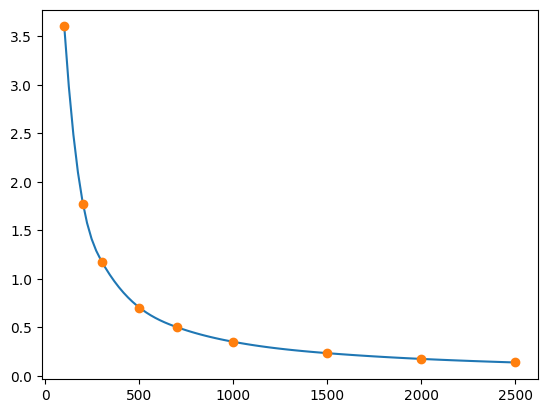

La densidad en las temperaturas 250,800,3000 es [1.387447   0.44140129 0.10893632] respectivamente


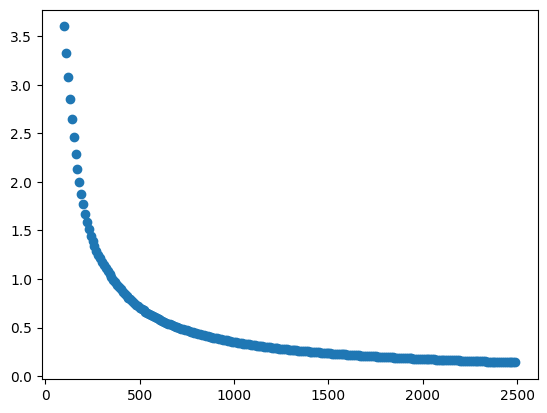

In [ ]:
#Como newton lo está haciendo tan raro lo voy a hacer con otros métodos

T = np.array([100, 200, 300, 500, 700, 1000, 1500, 2000, 2500]) # en K
rho = np.array([3.6010, 1.7684, 1.1774, 0.7048, 0.5030, 0.3524, 0.2355, 0.1762, 0.1394]) # en kg/m^3

Pspline=CubicSpline(T,rho)
Tarange=np.arange(100,2500,10)
Tspace=np.linspace(100,2500,100)
plt.plot(Tspace,Pspline(Tspace))
a=np.array([250,800,3000]) #Si le pongo 300 dice que hay overflow
plt.plot(T,rho,"o")
plt.show()
plt.plot(Tarange,Pspline(Tarange),"o")

print(f"La densidad en las temperaturas 250,800,3000 es {Pspline(a)} respectivamente")

# 4.
Uno de los dispositivos más precisos para medir temperatura es el termómetro de resistencia de platino, también conocido como RTD. En este dispositivo, un alambre delgado y largo de platino se enrolla alrededor de un carrete y se encapsula en una cubierta de acero inoxidable. La resistencia del alambre cambia de manera muy lineal con la temperatura. Una longitud típica de alambre tiene una resistencia de aproximadamente 100 $\Omega$ a $0^{\circ}$ C y cambia alrededor de 0.39 $\Omega/^{\circ}$ C. Por lo tanto, para medir temperaturas con precisión, es necesario poder medir cambios en la resistencia con alta resolución. Tradicionalmente, se ha utilizado el circuito de puente desequilibrado para esto, como se ilustra en la figura, el cual proporciona un voltaje de salida pequeño que es proporcional (aunque no linealmente) a la resistencia del sensor.

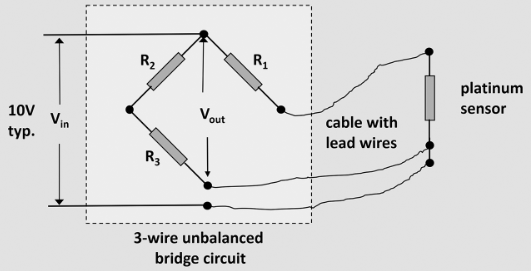




A continuación se presentan mediciones tomadas de dicho circuito, con $R_1 = R_2 = 5$ $k\Omega$ y $R_3 = 120$ $\Omega$:

```
resistencia = np.array([100, 115, 130, 145, 160, 175])  # Resistencia del sensor (Ohms)
voltaje = np.array([0.45244, 0.10592, -0.19918, -0.46988, -0.71167, -0.92896])  # Salida del puente (V)
```

Un termómetro de resistencia de platino estándar de 100 $\Omega$ tiene una resistencia de 139.27 $\Omega$ a $100^\circ$ C. Utilice el método de interpolación que desee para estimar el voltaje de salida del puente en estas condiciones. Si la salida del puente se mide en 0 voltios, estime la resistencia medida. ¿Qué conclusión puede obtener?

In [ ]:
resistencia = np.array([100, 115, 130, 145, 160, 175])  # Resistencia del sensor (Ohms)
voltaje = np.array([0.45244, 0.10592, -0.19918, -0.46988, -0.71167, -0.92896])  # Salida del puente (V)

Psplinesvolt=CubicSpline(resistencia,voltaje)
print(Psplinesvolt(139.27)) #Voltaje cuando la resistencia es 139.27
voltaje = np.array([-0.92896,-0.71167,-0.46988,-0.19918, 0.10592,0.45244 ])  #Lo volteé para que el método lo pudiera evaluar
resistencia = np.array([175, 160,145,130,115,100])
Psplinesres=CubicSpline(voltaje,resistencia)
print(Psplinesres(0)) #Resistencia cuando el voltaje es 0

print(f"Conclusión: La resistencia máxima es {Psplinesres(0) :.3f}, o sea cuando el voltaje es mínimo")

-0.3701534922704801
119.99914551777368
Conclusión: La resistencia máxima es 119.999, o sea cuando el voltaje es mínimo


# 5.
El índice de refracción del vidrio de borosilicato a diferentes longitudes de onda se presenta en la siguiente tabla. Estime la longitud de onda donde el índice de refracción es 1.520.

```
lambda_angstrom = np.array([6563, 6439, 5890, 5338, 5086, 4861, 4340, 3988])  # en Å
indice_refraccion = np.array([1.50883, 1.50917, 1.51124, 1.51386, 1.51534, 1.51690, 1.52136, 1.52546])
```

In [ ]:
lambda_angstrom = np.array([6563, 6439, 5890, 5338, 5086, 4861, 4340, 3988])  # en Å
indice_refraccion = np.array([1.50883, 1.50917, 1.51124, 1.51386, 1.51534, 1.51690, 1.52136, 1.52546])

CubicSpline(indice_refraccion,lambda_angstrom)(1.520)

array(4482.26512049)